# 3조 : 1주차 제조데이터 실습 모델링 코드

In [1]:
cleaned_file_path = '../data/1주_실습데이터_test.csv'

### 데이터 로드

In [2]:
import pandas as pd

data = pd.read_csv(cleaned_file_path)

In [3]:
y1_count = data[data['Y'] == 1].shape[0]
y1_count/len(data)

0.10815939278937381

In [4]:
1142/len(data)

0.0021669829222011384

In [5]:
X = data.drop(columns=['Y'])
y = data['Y'].values

In [6]:
X.shape

(527000, 16)

In [7]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,0.202296,0.003560,0.411261,0.015348,0.693147,0.036360,0.343512,0.028087,0.681974,0.295769,0.003053,0.682731,0.249262,0.681974,0.016330,0.242926
1,0.006836,0.007688,0.597304,0.015348,0.686838,0.067407,0.347869,0.028640,0.497403,0.297943,0.005816,0.680891,0.249262,0.497403,0.670040,0.245876
2,0.609621,0.001461,0.466186,0.015348,0.693090,0.018944,0.345032,0.024502,0.647685,0.298255,0.001475,0.685525,0.249262,0.647685,0.648486,0.243602
3,0.074007,0.003072,0.535876,0.015348,0.693147,0.031475,0.347502,0.025393,0.587787,0.296057,0.002462,0.677980,0.249262,0.575364,0.632563,0.246078
4,0.198356,0.007020,0.416238,0.015348,0.686838,0.061888,0.347441,0.028450,0.537143,0.298167,0.005314,0.673286,0.249262,0.537143,0.671124,0.245505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526995,0.612937,0.001173,0.401400,0.015348,0.693147,0.015237,0.346218,0.020338,0.470004,0.298167,0.001164,0.679403,0.249262,0.483797,0.664080,0.243377
526996,0.512265,0.002282,0.395505,0.015348,0.688810,0.021745,0.342540,0.024307,0.681974,0.297209,0.002300,0.687581,0.249262,0.670674,0.658006,0.240500
526997,0.390334,0.008615,0.415327,0.015348,0.693147,0.068450,0.451511,0.028167,0.470004,0.599760,0.007902,0.680428,0.249262,0.456017,0.682601,0.693147
526998,0.512265,0.002267,0.394744,0.015348,0.688810,0.020826,0.341926,0.024307,0.693147,0.296889,0.002346,0.689263,0.249262,0.681974,0.658006,0.240500


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [9]:
# 데이터 스케일링
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
371127,0.164282,0.003623,0.593777,0.015348,0.504250,0.036678,0.348663,0.018398,0.483797,0.296217,0.002955,0.669775,0.249262,0.497403,0.611635,0.246415
156271,0.404435,0.005495,0.610812,0.015348,0.689448,0.051284,0.348174,0.027181,0.497403,0.298326,0.004076,0.680382,0.249262,0.497403,0.629478,0.246348
452709,0.567187,0.001044,0.555287,0.015348,0.693147,0.018109,0.347961,0.020861,0.456017,0.297961,0.001158,0.678282,0.249262,0.470004,0.663656,0.245674
501099,0.049564,0.003185,0.397361,0.015348,0.693147,0.029353,0.342386,0.024778,0.659246,0.295929,0.003113,0.687521,0.249262,0.647685,0.637721,0.240839
451044,0.465514,0.004452,0.441080,0.015348,0.693147,0.041612,0.344398,0.028199,0.647685,0.294552,0.003617,0.677397,0.249262,0.635989,0.010111,0.243865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.196897,0.002555,0.424232,0.015348,0.510595,0.028067,0.344749,0.025968,0.647685,0.297094,0.002410,0.673257,0.249262,0.647685,0.627981,0.243783
259178,0.490971,0.006373,0.414416,0.015348,0.693147,0.056755,0.346861,0.028269,0.562785,0.297648,0.004850,0.677900,0.249262,0.562785,0.678328,0.245100
365838,0.360378,0.004804,0.410179,0.015348,0.693147,0.045387,0.345555,0.028167,0.635989,0.295209,0.003983,0.670844,0.249262,0.624154,0.687424,0.244121
131932,0.441214,0.003725,0.557229,0.015348,0.693147,0.038871,0.344398,0.028084,0.670674,0.297642,0.003407,0.684956,0.249262,0.670674,0.693040,0.243377


In [11]:
# # 불균형 데이터 처리 (SMOTE 적용)
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [12]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
371127,0.164282,0.003623,0.593777,0.015348,0.504250,0.036678,0.348663,0.018398,0.483797,0.296217,0.002955,0.669775,0.249262,0.497403,0.611635,0.246415
156271,0.404435,0.005495,0.610812,0.015348,0.689448,0.051284,0.348174,0.027181,0.497403,0.298326,0.004076,0.680382,0.249262,0.497403,0.629478,0.246348
452709,0.567187,0.001044,0.555287,0.015348,0.693147,0.018109,0.347961,0.020861,0.456017,0.297961,0.001158,0.678282,0.249262,0.470004,0.663656,0.245674
501099,0.049564,0.003185,0.397361,0.015348,0.693147,0.029353,0.342386,0.024778,0.659246,0.295929,0.003113,0.687521,0.249262,0.647685,0.637721,0.240839
451044,0.465514,0.004452,0.441080,0.015348,0.693147,0.041612,0.344398,0.028199,0.647685,0.294552,0.003617,0.677397,0.249262,0.635989,0.010111,0.243865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.196897,0.002555,0.424232,0.015348,0.510595,0.028067,0.344749,0.025968,0.647685,0.297094,0.002410,0.673257,0.249262,0.647685,0.627981,0.243783
259178,0.490971,0.006373,0.414416,0.015348,0.693147,0.056755,0.346861,0.028269,0.562785,0.297648,0.004850,0.677900,0.249262,0.562785,0.678328,0.245100
365838,0.360378,0.004804,0.410179,0.015348,0.693147,0.045387,0.345555,0.028167,0.635989,0.295209,0.003983,0.670844,0.249262,0.624154,0.687424,0.244121
131932,0.441214,0.003725,0.557229,0.015348,0.693147,0.038871,0.344398,0.028084,0.670674,0.297642,0.003407,0.684956,0.249262,0.670674,0.693040,0.243377


## 베이스라인 모델 선정

### AutoML

In [11]:
# # PyCaret의 분류 모듈 import
# from pycaret.classification import *

# classificator = setup(
#     data,
#     target='Y',
#     train_size=0.8,
#     data_split_stratify=True,
#     session_id=0
# )

# comp_model = compare_models()

### XGB 모델 성능 평가

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# XGBoost 분류기
xgb = XGBClassifier(learning_rate=0.01, objective='binary:logistic', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

[[93882     1]
 [  127 11390]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93883
           1       1.00      0.99      0.99     11517

    accuracy                           1.00    105400
   macro avg       1.00      0.99      1.00    105400
weighted avg       1.00      1.00      1.00    105400



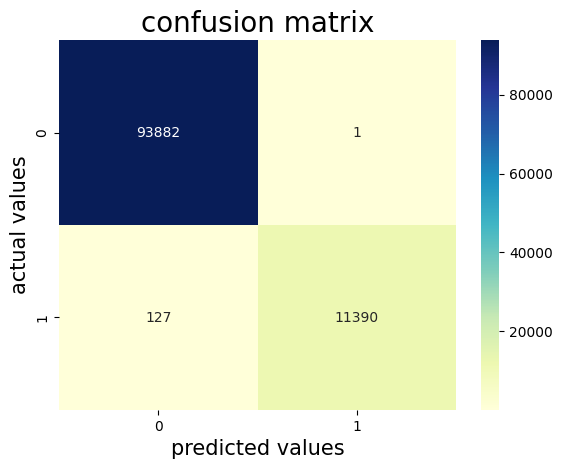

TN, FP, FN, TP: 93882 1 127 11390
accuracy 0.9987855787476281
precision 0.9999122113949609
recall 0.988972822783711
F1 score 0.9944124323380478


In [16]:
# 예측 및 평가
y_test_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", cmap='YlGnBu')
plt.xlabel('predicted values', size=15)
plt.ylabel('actual values', size=15)
plt.title('confusion matrix', size=20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

print('accuracy', accuracy_score(y_test, y_test_pred))
print('precision', precision_score(y_test, y_test_pred))
print('recall', recall_score(y_test, y_test_pred))
print('F1 score', f1_score(y_test, y_test_pred))

### 변수가 모델에 미치는 영향

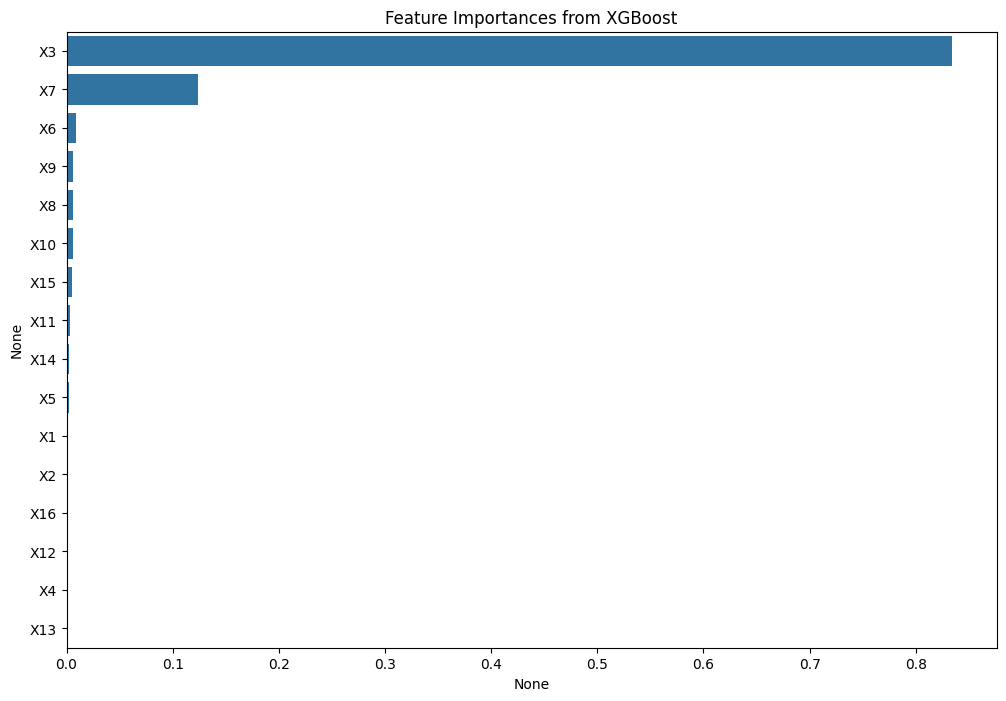

In [17]:
# Feature importance
feature_importances = pd.Series(xgb.feature_importances_, index=data.drop(columns=['Y']).columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances from XGBoost')
plt.show()

In [16]:
from pdpbox import info_plots

# pima_feature = X_train.columns
# pima_target = 'Y'

target_plot = info_plots.TargetPlot(
    df=data,
    feature='X3',
    feature_name='X3',
    target='Y',
)

c:\Users\USER\projects\LS_DA_practice\venv\lib\site-packages\pdpbox\utils.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x"] = cut_result.codes
c:\Users\USER\projects\LS_DA_practice\venv\lib\site-packages\pdpbox\utils.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x"] = df.apply(


### PDP 해보기

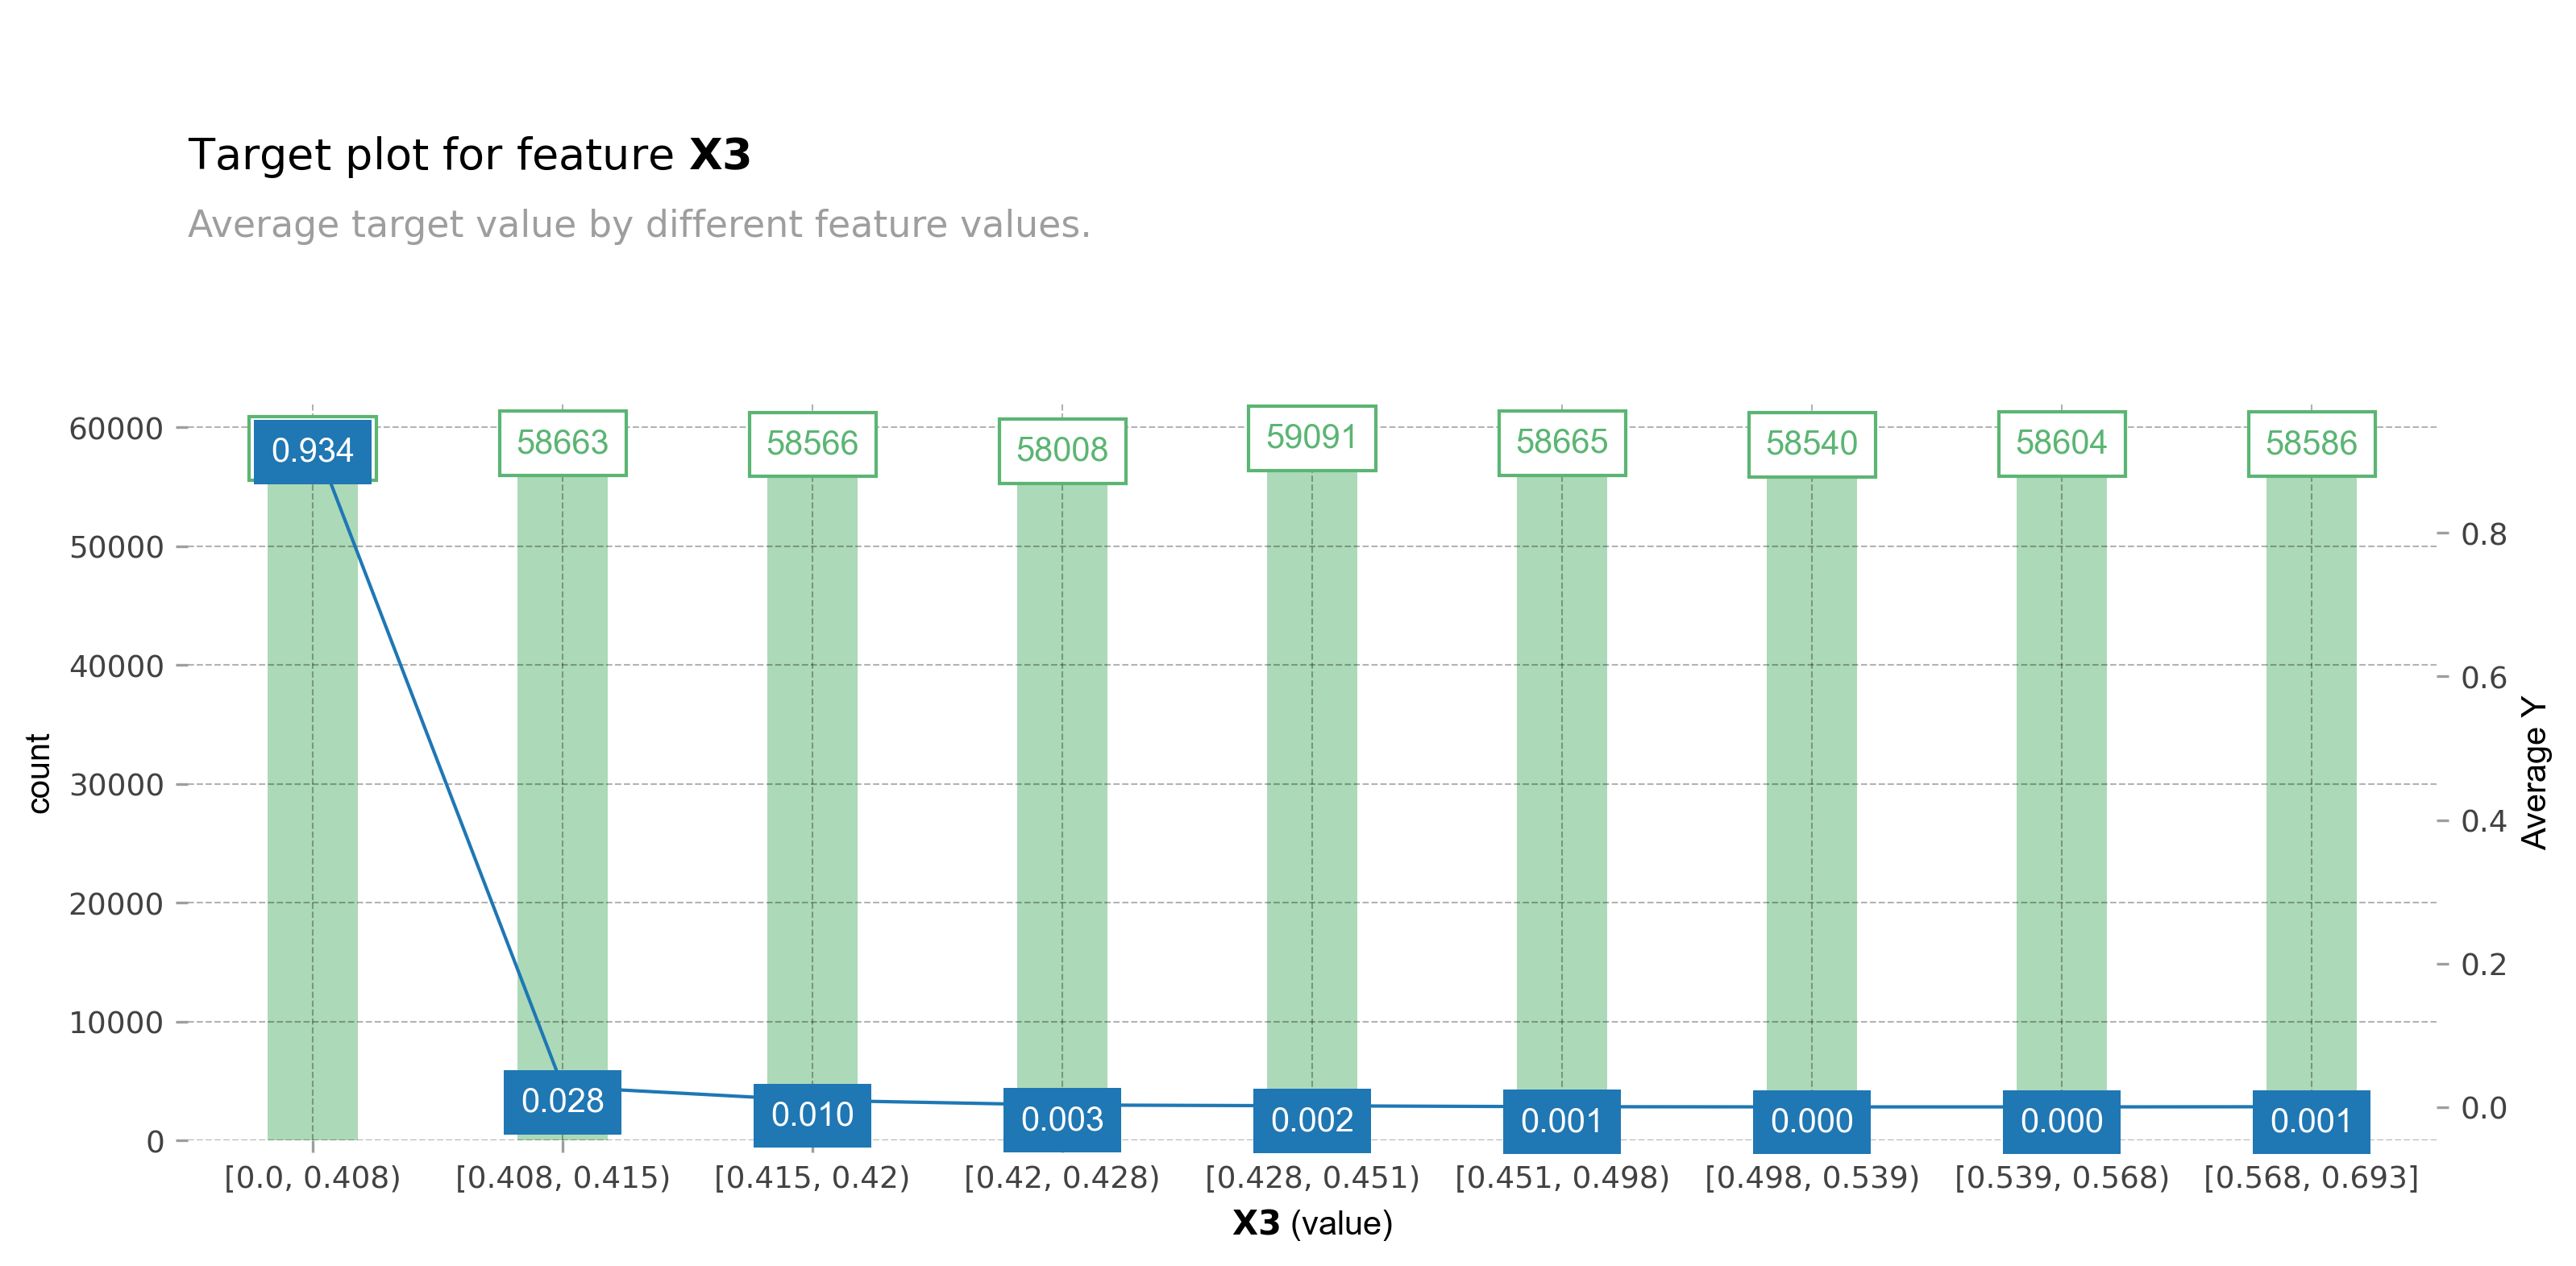

In [17]:
fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

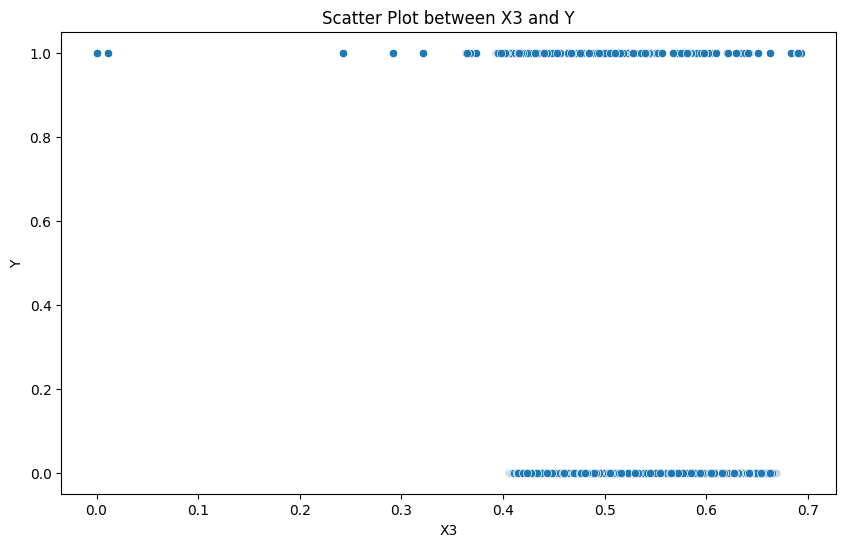

In [18]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X3', y='Y', data=data)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Scatter Plot between X3 and Y')
plt.show()


In [19]:
condition = (data['Y'] == 1)
count_one = data[condition].shape[0]
condition = (data['Y'] == 0)
count_zero = data[condition].shape[0]

(count_zero, count_one)

(469960, 56995)

In [20]:
condition = (data['X3'] < 0.405) & (data['Y'] == 0)
count = data[condition].shape[0]

count

0

In [21]:
condition = (data['X3'] < 0.405) & (data['Y'] == 1)
count = data[condition].shape[0]

count

53263

In [22]:
condition = (data['X3'] >= 0.405) & (data['Y'] == 1)
count = data[condition].shape[0]

count

3732

c:\Users\USER\projects\LS_DA_practice\venv\lib\site-packages\pdpbox\utils.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x"] = cut_result.codes
c:\Users\USER\projects\LS_DA_practice\venv\lib\site-packages\pdpbox\utils.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x"] = df.apply(


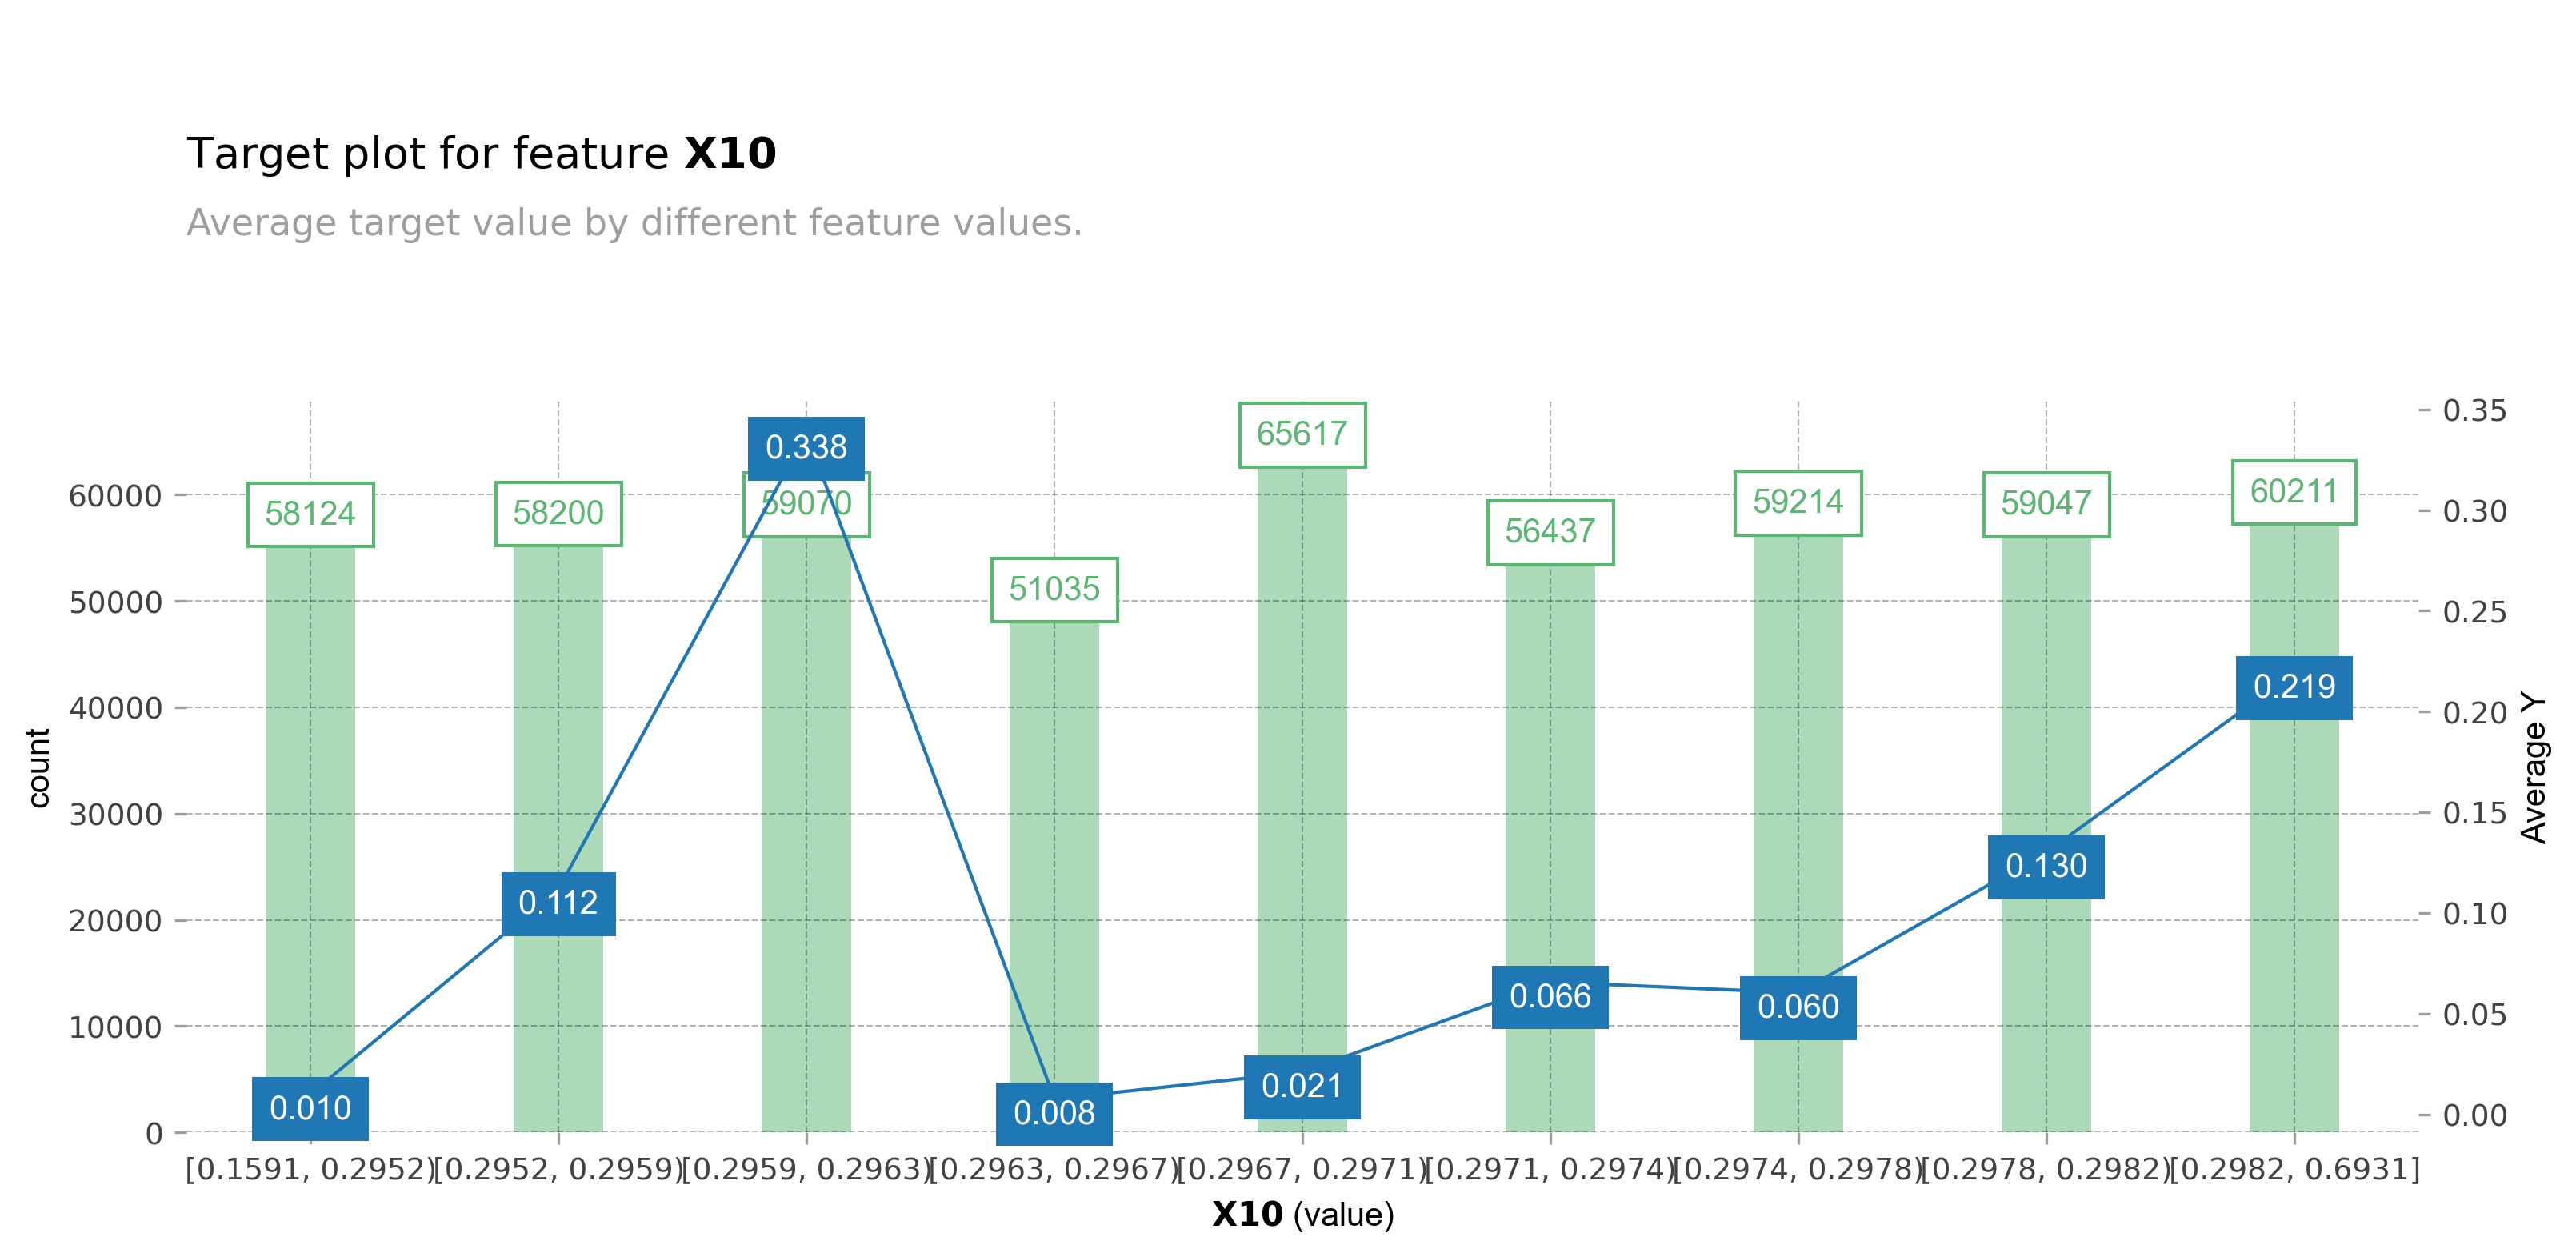

In [23]:
target_plot = info_plots.TargetPlot(
    df=data,
    feature='X10',
    feature_name='X10',
    target='Y',
)
fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

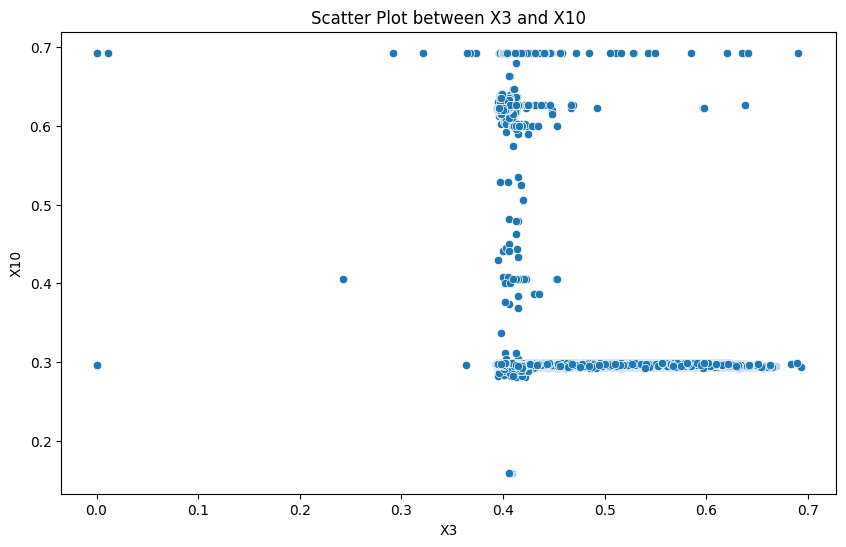

Pearson Correlation Coefficient between X3 and X10:
           X3       X10
X3   1.000000 -0.064932
X10 -0.064932  1.000000


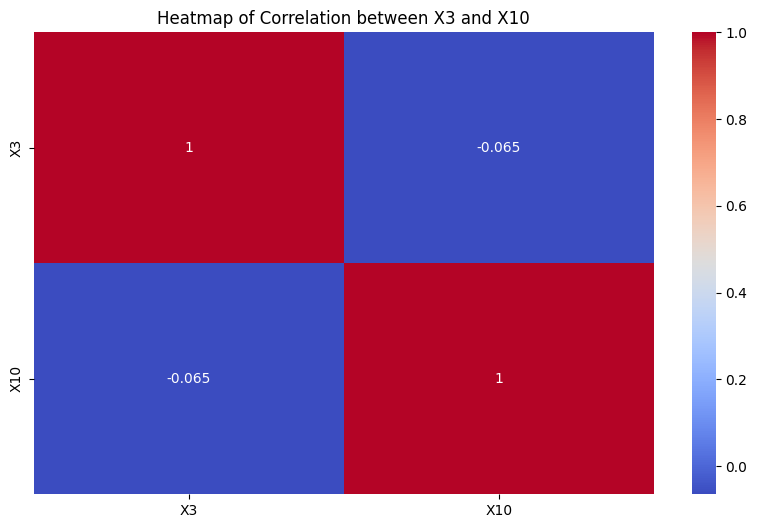

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X3', y='X10', data=data)
plt.xlabel('X3')
plt.ylabel('X10')
plt.title('Scatter Plot between X3 and X10')
plt.show()

# 피어슨 상관 계수 계산
correlation = data[['X3', 'X10']].corr(method='pearson')
print("Pearson Correlation Coefficient between X3 and X10:")
print(correlation)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(data[['X3', 'X10']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation between X3 and X10')
plt.show()

In [18]:
import os
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams ## 차트의 크기를 조절하기 위한 라이브러리


os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
rcParams['figure.figsize'] = 200, 100 ## 차트의 크기를 조절

## 트리를 그린다.
plot_tree(xgb)
plt.show() ## 차트를 보여준다.

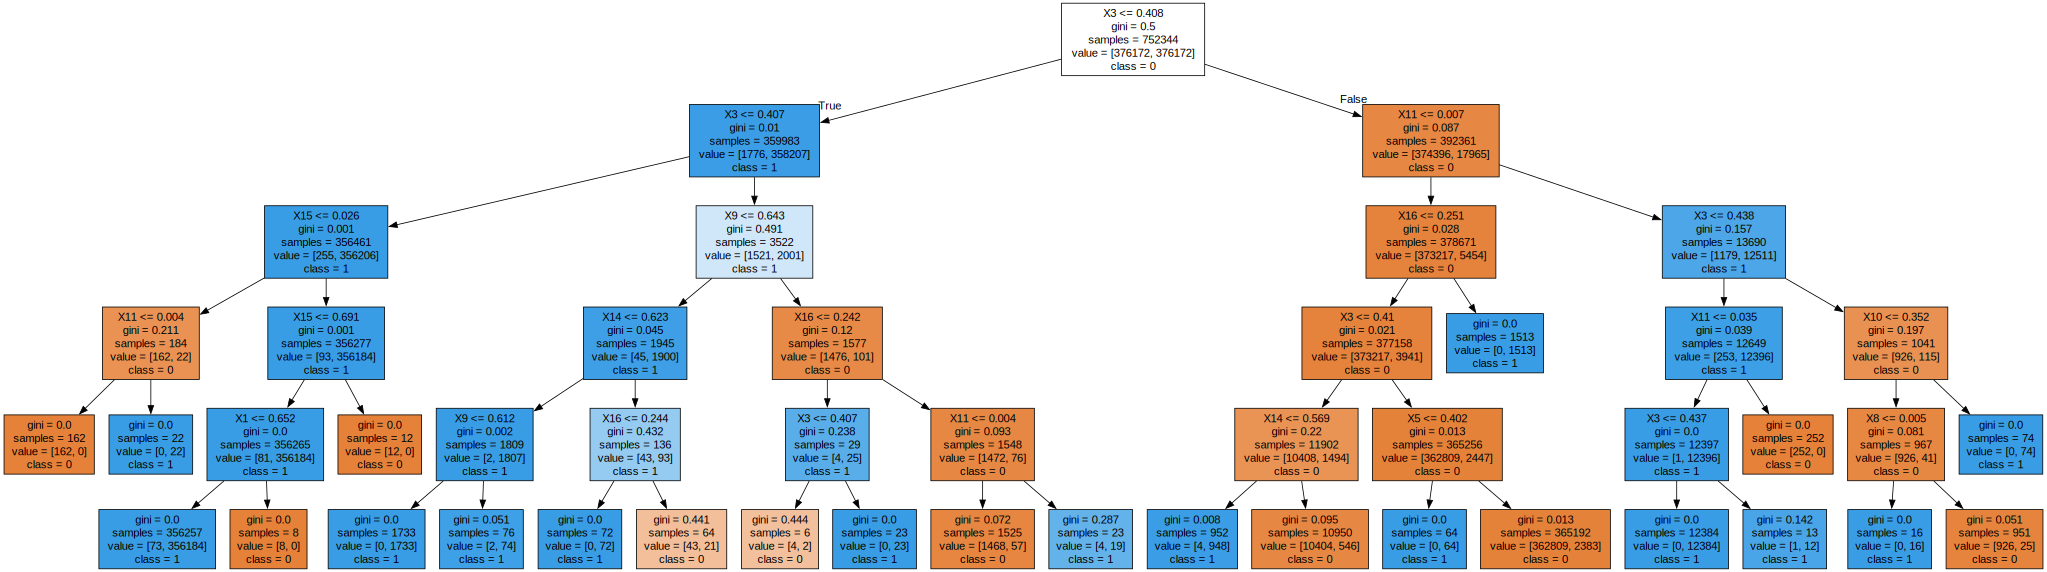

In [26]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42, 
                                max_depth=5,
                                )

dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", 
                class_names=['0','1'],
                feature_names = X_train.columns, 
                impurity=True, 
                filled=True)

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [27]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,0.654518,0.004330,0.412258,0.015348,0.693147,0.041698,0.343890,0.027929,0.670674,0.294763,0.003656,0.687511,0.249262,0.670674,0.689884,0.243276
1,0.030328,0.003398,0.533966,0.015348,0.693147,0.035842,0.347777,0.025855,0.575364,0.295982,0.002928,0.683176,0.249262,0.562785,0.632312,0.246280
2,0.676623,0.003292,0.423246,0.015348,0.693090,0.034267,0.346269,0.024797,0.562785,0.297013,0.002700,0.686104,0.249262,0.575364,0.643912,0.244616
3,0.586322,0.005767,0.565887,0.015348,0.693147,0.053185,0.345973,0.028202,0.587787,0.297368,0.004557,0.674534,0.249262,0.587787,0.679156,0.244425
4,0.640801,0.003742,0.436793,0.015348,0.693147,0.036961,0.343879,0.027882,0.670674,0.297188,0.003086,0.670879,0.249262,0.670674,0.013128,0.243186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752339,0.512265,0.002000,0.394782,0.015348,0.688810,0.019934,0.342233,0.024307,0.681974,0.297209,0.002169,0.688340,0.249262,0.670674,0.658006,0.240500
752340,0.012812,0.004517,0.397058,0.015348,0.693147,0.037849,0.345300,0.025634,0.562785,0.298486,0.004182,0.683974,0.249262,0.562785,0.632223,0.242870
752341,0.141556,0.003542,0.396221,0.015348,0.693090,0.029941,0.344381,0.024707,0.587787,0.297495,0.003377,0.687435,0.249262,0.600057,0.644881,0.242870
752342,0.399744,0.004081,0.000000,0.015348,0.000000,0.034381,0.346524,0.017663,0.510826,0.295929,0.003905,0.676462,0.249262,0.510826,0.613330,0.243940
